<div style="border-bottom: 2px solid #5c5c5c33;">
    <div  style="font-size: 30px;margin-bottom: 20px; text-align: center;">بسم الله الرحمن الرحیم</div>
    <br>
    <div style="font-size:20px; padding-bottom: 20px;line-height: 2; text-align: center;"> طراحی سامانه های یادگیری ماشین <br> تمرین اول</div>
    <div style="font-size:17px; direction:rtl;padding-bottom: 15px;">نام و نام خانوادگی : زینب احیائی</div>
    <div style="font-size:17px; direction:rtl; padding-bottom: 15px;">شماره دانشجویی : 400201061</div>
</div>

<div style="direction:rtl">
    <h2 style="padding-bottom: 20px;">آماده‌سازی داده</h2>
    <div style="font-size: 16px;line-height: 1.6;">
        در این بخش ابتدا داده‌های خام مربوط به ۱۲۲۱ محصول از طریق خزش در وب سایت <a href="https://divar.ir/">دیوار</a>
     در دسته کالاهای دیجیتال و در زیر دسته‌های موبایل و تبلت، رایانه، کنسول و بازی ویدئویی و آنلاین  
        و صوتی و تصویری  و از بین آگهی‌های شهر‌های تهران، مشهد، شیراز و اصفهان جمع آوری شده است.
        این کار با استفاده از <a href="https://scrapy.org/">scrapy</a>
        و در دو مرحله انجام شده است.
        در مرحله اول آدرس‌های این محصولات به دست آمده و در مرحله بعد اطلاعات محصول از داخل این صفحات استخراج شده است.
        برای استخراج آدرس‌ها از spider ای با ساختار زیر استفاده شده است:
    </div>
</div>

```
import scrapy
from scrapy.selector import Selector
from selenium import webdriver
import time

class URLSpider(scrapy.Spider):
    name = "urlspider"
    allowed_domains = ["divar.ir"]
    start_urls = ["https://divar.ir/s/mashhad/mobile-tablet"]
    
    def __init__(self):
        self.driver = webdriver.Chrome()
        self.count = 0


    def closed(self, reason):
        self.driver.quit()


    def parse(self, response):
        self.driver.get(response.url)

        # Scroll down and load more data
        while True:
            self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)
            sel = Selector(text=self.driver.execute_script("return document.body.innerHTML;"))

            for post in sel.css('div.post-card-item-af972'):
                self.count = self.count + 1
                href = post.css('a:nth-child(1)::attr(href)').extract()

                yield {
                    'href': href,
                }
            
            if self.count > 200 :
                break

        self.driver.quit()
```

<div style="font-size: 16px;line-height: 1.6;direction:rtl">
      برای استخراج اطلاعات محصول نیز از spider ای با ساختار زیر استفاده شده است:
</div>


```
import json
import time
from scrapy import Spider, Request, Selector

class DataSpider(Spider):
    name = 'dataspider'
   
    def start_requests(self):
        with open('/Users/zeinab/Desktop/MLSD_HW1/scrapy/divar/urls/mashhad-mobile-tablet.json', 'r') as f:
            urls = json.load(f)
        for url in urls:
            time.sleep(1)
            yield Request(url="https://divar.ir" + url["href"][0], callback=self.parse)

    def parse(self, response):
        price = ''
        for value in response.css('p.kt-unexpandable-row__value'):
            if('تومان' in value.css("::text").get().strip()):
                price = value.css("::text").get().strip()

        img_div = response.css('div.kt-carousel__thumbnails')
        img_count = len(img_div.css('img'))

        yield {
            'title' : response.css('div.kt-page-title__title::text').get(),
            'desc' : response.css('p.kt-description-row__text::text').get(),
            'brand' : response.css('a.kt-unexpandable-row__action::text').get(),
            'image-count' : max(1, img_count),
            'price' : price,
            'city' : 'Mashhad',
            'category' : 'mobile-tablet'
        }
```

<div style="font-size: 16px;line-height: 1.6;direction:rtl">
      در نهایت نتایج در یک فایل json با فرمتی مشابه زیر ذخیره شده است:
</div>


```
[
    {
    "title": "سینما خانگی سامسونگ ۱۰۰۰ وات، ساخت اندونزی",
    "desc": "سینما خانگی ۷ تیکه دارای ۴ باند یک ساب، یک DVD player ، یک باند کوچک رو میزی، حدود ۲ ساله استفاده نشده، بسیار تمیز",
    "brand": null,
    "image-count": 4,
    "price": "۳٬۷۰۰٬۰۰۰ تومان",
    "city": "Tehran",
    "category": "video-audio-device"
  }
]
```


<div style="direction:rtl">
    <h3 style="padding-bottom: 20px; direction: rtl;">تبدیل داده به ساختار جدولی</h3>
    <div style="font-size: 16px;line-height: 1.6;">
   در این بخش داده‌ها به فرمت جدولی تبدیل شده و ساختار جدول آن در sql شرح داده می‌شود.
    </div>
</div>

In [59]:
import json
import csv

# Open the JSON file
with open('data/data.json', 'r') as json_file:
    data = json.load(json_file)

# Open the CSV file and write headers
with open('data/data.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['title', 'desc', 'brand', 'image-count', 'price', 'category', 'city'])

    # Write data rows to CSV file
    for item in data:
        writer.writerow([item['title'], item['desc'],
                         item['brand'], item['image-count'], 
                         item['price'], item['category'], item['city']])

<div style="font-size: 16px;line-height: 1.6;direction: rtl;">
  حال می توان داده را در جدولی مشابه جدول زیر در دیتابیس ذخیره کرد.
</div>


  ```
  CREATE TABLE tblDivar (
    fldID BIGINT identity(1, 1),
    fldTitle NVARCHAR(250),
    fldDesc NVARCHAR(MAX),
    fldBrand NVARCHAR(250),
    fldImageCount INT, 
    fldPrice NVARCHAR(250),
    fldCategory NVARCHAR(250),
    fldCity NVARCHAR(250)
);
```


<div style="direction:rtl">
    <h3 style="padding-bottom: 20px; direction: rtl;">کنترل نسخه</h3>
    <div style="font-size: 16px;line-height: 1.6;">
   برای کنترل نسخه داده از ابزار dvc استفاده شده است و. از این 
        <a href="https://github.com/Ehyaee/MLSD_HW1">لینک گیتهاب</a>
        و این 
        <a href="https://drive.google.com/drive/folders/1tSGQp5h-9Yie5EdEeVHwE9-51CNHzxJe?usp=sharing">لینک گوگل درایو </a>
        استفاده شده است.
    </div>
</div>

<div style="direction:rtl">
    <h2 style="padding-bottom: 20px;">تحلیل اکتشافی داده</h2>
    <div style="font-size: 16px;line-height: 1.6;">
      در این بخش به بررسی بیشتر داده می‌پردازیم.
    </div>
    <h3 style="padding-bottom: 20px;">تحلیل اکتشافی داده</h3>
</div>

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

df = pd.read_csv("data/data.csv")
df.head()

,title,desc,brand,image-count,price,category,city
0,سینما خانگی سامسونگ ۱۰۰۰ وات، ساخت اندونزی,سینما خانگی ۷ تیکه دارای ۴ باند یک ساب، یک DVD...,NaN,4,۳٬۷۰۰٬۰۰۰ تومان,video-audio-device,Tehran
1,اسپیکر بلوتوثی,اتصال بی‌سیم و باسیم\nجک ۳.۵ میلی‌متری صدا، بل...,NaN,1,۱٬۴۰۰٬۰۰۰ تومان (مقطوع),video-audio-device,Tehran
2,ال سی دی سونی 55 اینج,Sony 55 inch \nفقط روی صفحه خط سیاه افتاده و م...,NaN,1,۹٬۰۰۰٬۰۰۰ تومان (مقطوع),video-audio-device,Tehran
3,تلویزیون شهاب ٢١ در حد نو,٢١ اینج\nکار نکرده و در حد نو,NaN,2,۶۵۰٬۰۰۰ تومان,video-audio-device,Tehran
4,NaN,NaN,NaN,1,NaN,video-audio-device,Tehran


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1166 non-null   object
 1   desc         1166 non-null   object
 2   brand        199 non-null    object
 3   image-count  1221 non-null   int64 
 4   price        1164 non-null   object
 5   category     1221 non-null   object
 6   city         1221 non-null   object
dtypes: int64(1), object(6)
memory usage: 66.9+ KB


<AxesSubplot: xlabel='category', ylabel='count'>

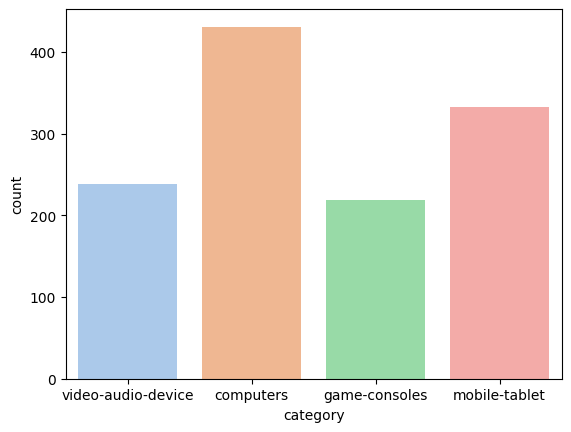

In [62]:
sns.countplot(x='category', data=df, palette='pastel')

<AxesSubplot: xlabel='city', ylabel='count'>

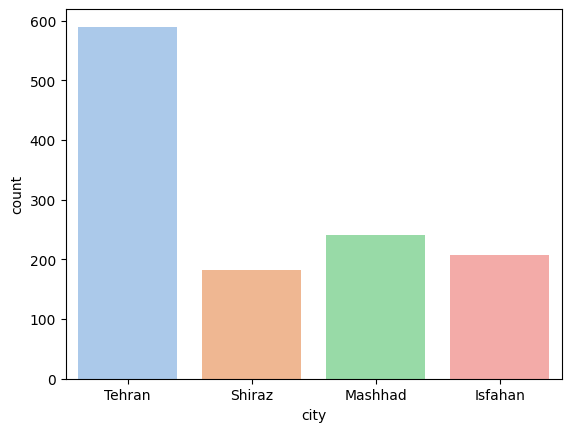

In [63]:
sns.countplot(x='city', data=df, palette='pastel')

In [64]:
df.isnull().sum()

title            55
desc             55
brand          1022
image-count       0
price            57
category          0
city              0
dtype: int64

<div style="direction:rtl">
    <h3 style="padding-bottom: 20px;">پاک‌سازی داده</h3>
    <h4>حذف سطر های با عنوان و قیمت null</h4>
</div>

In [65]:
df = df.dropna(subset=['title', 'price'])
df.isnull().sum()

title            0
desc             0
brand          965
image-count      0
price            0
category         0
city             0
dtype: int64

<div style="direction:rtl">
    <h4 style="padding-bottom: 20px;">حذف unicode ها</h4>
    <div style="font-size: 16px;line-height: 1.6;">
        در متن عناوین و توضیحات 
        تعدادی
        unicode  وجود دارد.
        به عنوان اولین مرحله این
        unicode ها حذف می‌شود.
  
   </div> 
</div>


In [66]:
def remove_unicode(text):
    # regular expression pattern to match Unicode characters
    pattern = r'[^\u0600-\u06FF\u0660-\u0669\u06F0-\u06F9\u0020\u002E\u002C\u061B\u003A\u002D\u002F\u0028\u0029\u005B\u005D\u007B\u007D\u00AB\u00BB\u2018\u2019\u201C\u201D\u00A0\u200C\u200F]+'
    
    text = text.replace("\n", " ")
    
    # remove Unicode characters using re.sub()
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text

# remove unicodes 
df['title'] = df['title'].apply(lambda x: remove_unicode(x))
df['desc'] = df['desc'].apply(lambda x: remove_unicode(x))
